# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df = df.drop(columns=['CUST_ID'])
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Check for duplicates

In [5]:
sum(df.duplicated())

0

### Check for null values

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [8]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Features Correlation Visualization

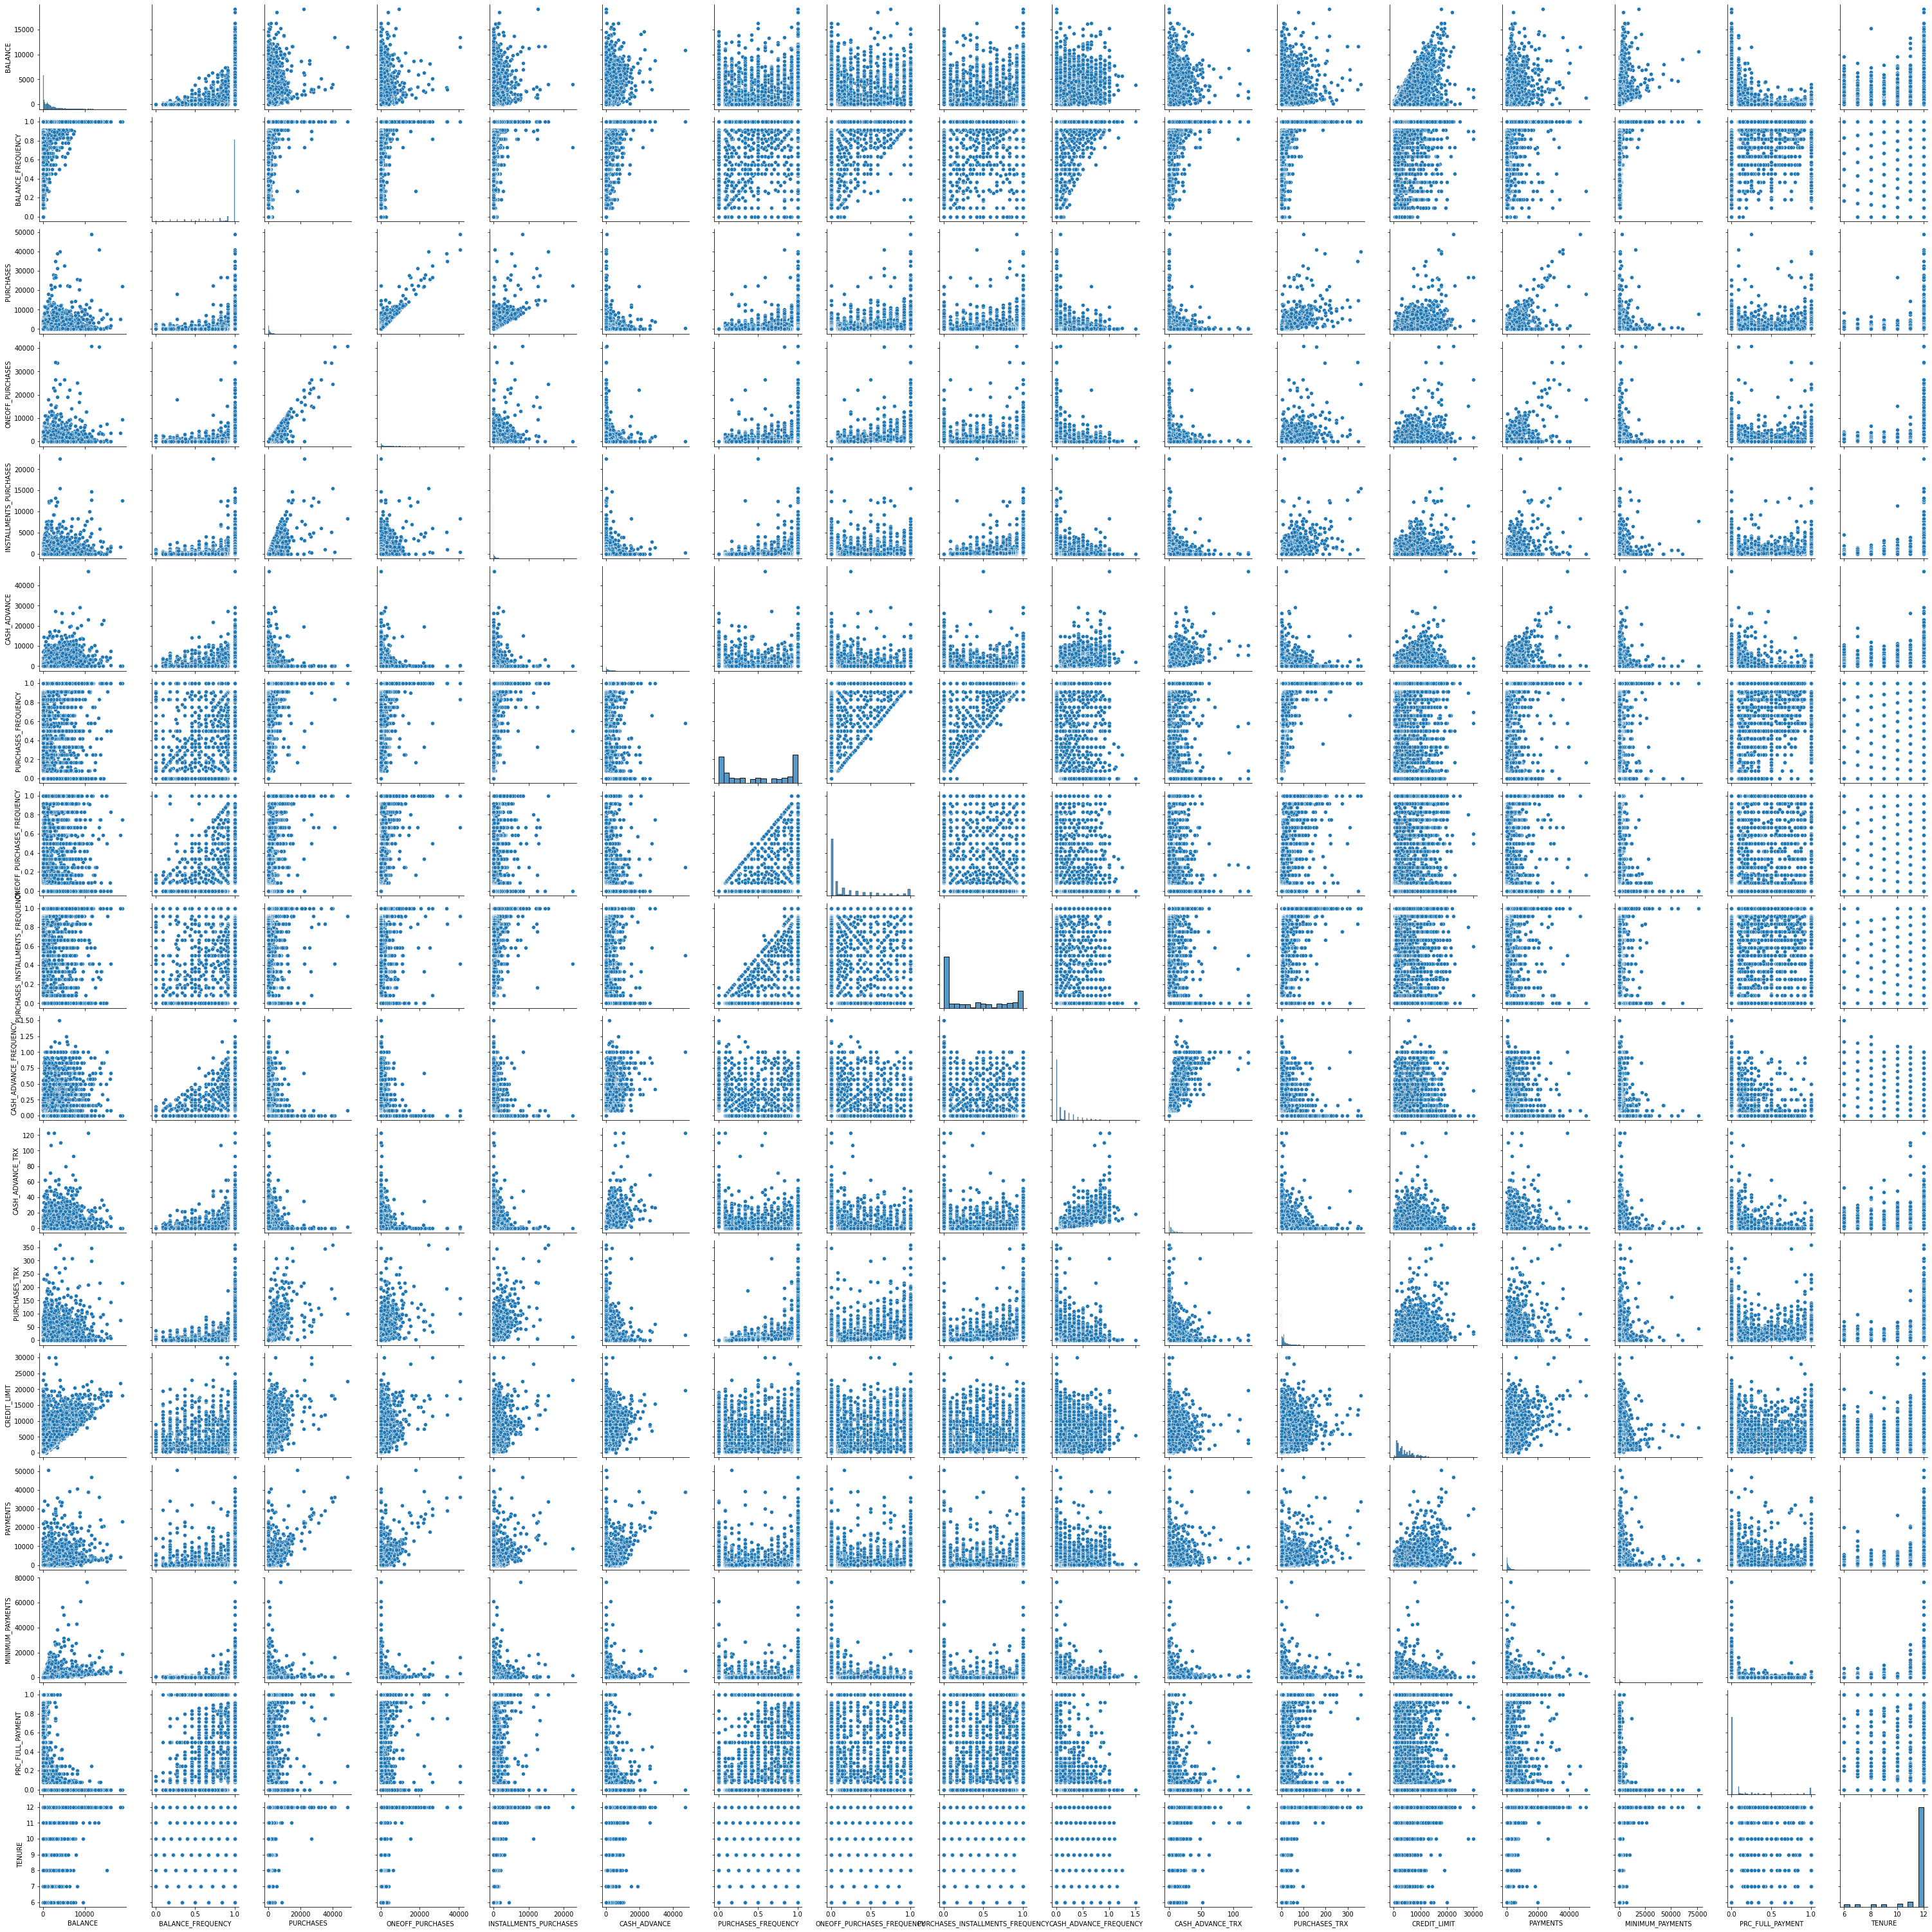

In [10]:
sns.pairplot(df)

### Data Standardization

In [11]:
cols = df.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [12]:
scaler = StandardScaler()
std_df = pd.DataFrame(scaler.fit_transform(df), columns=cols)
std_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


### Estimating Number of Clusters

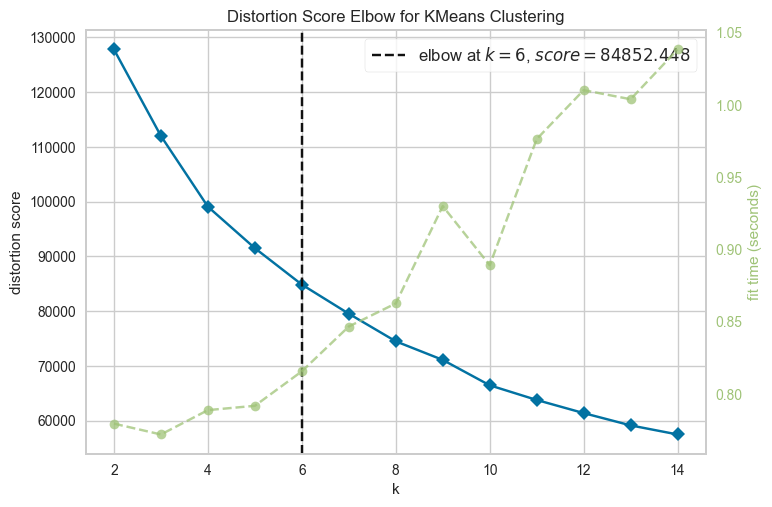

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(std_df)        
visualizer.show() 

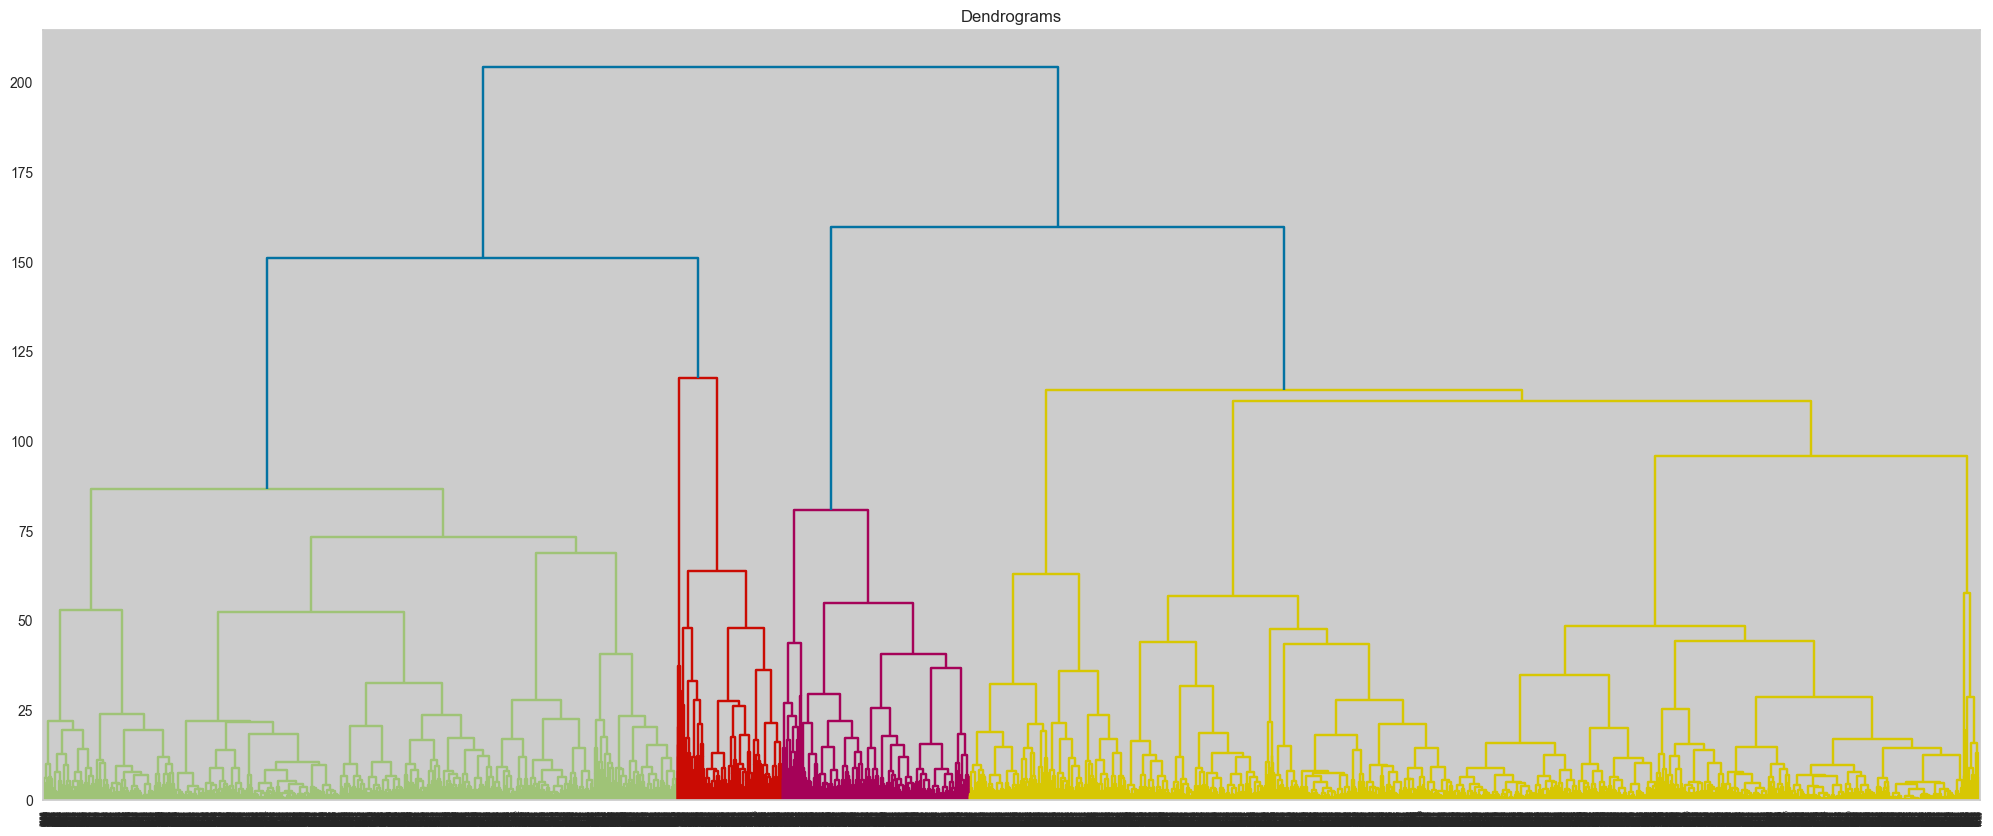

In [14]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25, 10))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(std_df, method='ward'))

KMeans 
 Silhouette Score: 0.20259398485856095


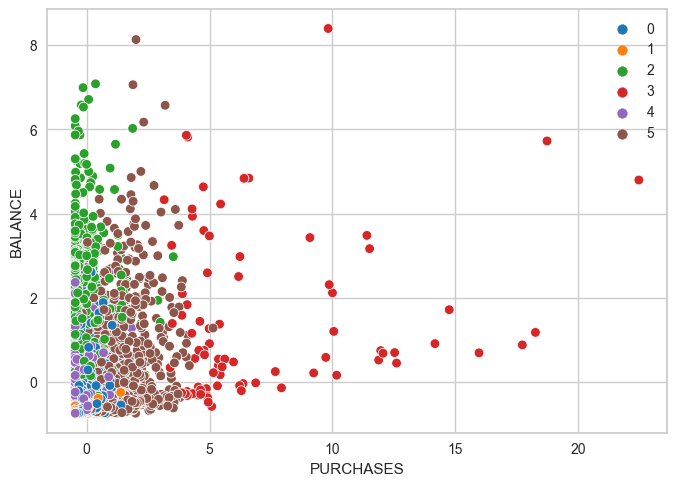

DBSCAN 
 Silhouette Score: 0.7399237289823687


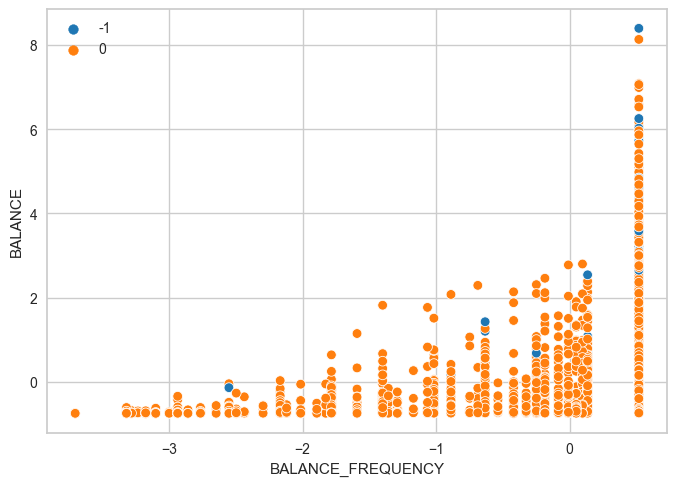

Hierarchical Clustering 
 Silhouette Score: 0.17335577924064002


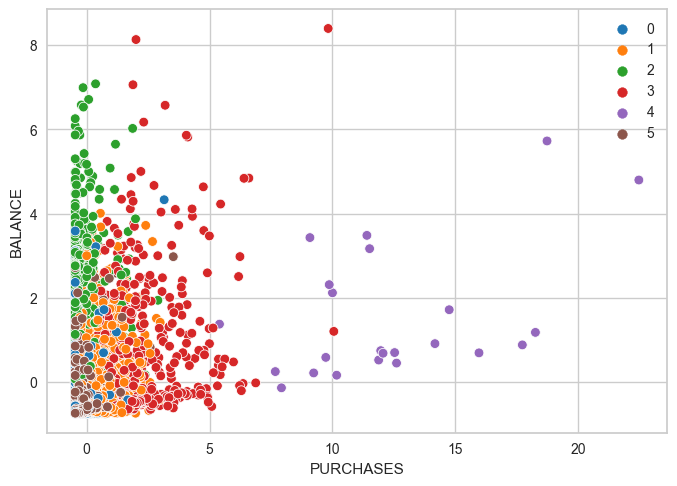

Gaussian Mixture 
 Silhouette Score: 0.04485235797017864


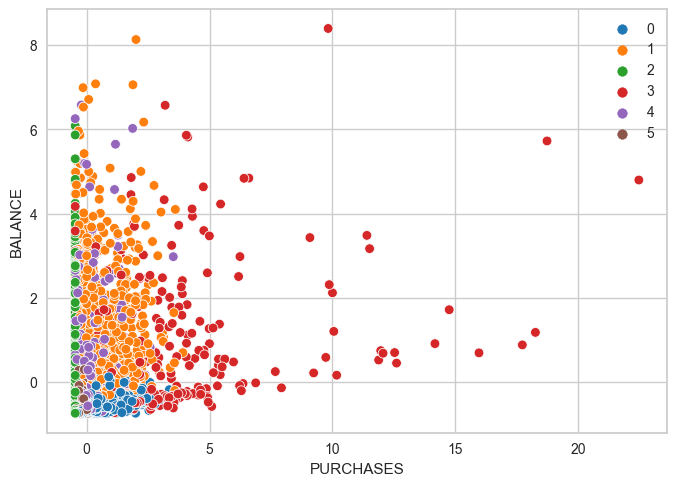

In [15]:
kmean = KMeans(n_clusters=6, random_state=0).fit(std_df)
k_label = kmean.predict(std_df)
print('KMeans', '\n', f'Silhouette Score: {silhouette_score(std_df, k_label)}')
fig1 = sns.scatterplot(data=std_df, x=std_df["PURCHASES"], y=std_df["BALANCE"], hue=k_label, palette="tab10")
plt.show(sns)

DB = DBSCAN(eps=5, min_samples=25).fit(std_df)
d_label = DB.labels_
print('DBSCAN', '\n', f'Silhouette Score: {silhouette_score(std_df, d_label)}')
fig2= sns.scatterplot(data=std_df, x=std_df["BALANCE_FREQUENCY"], y=std_df["BALANCE"], hue=d_label, palette="tab10")
plt.show(sns)

HC = AgglomerativeClustering(n_clusters=6).fit(std_df)
h_label = HC.labels_
print('Hierarchical Clustering', '\n', f'Silhouette Score: {silhouette_score(std_df, h_label)}')
fig3 = sns.scatterplot(data=std_df, x=std_df["PURCHASES"], y=std_df["BALANCE"], hue=h_label, palette="tab10")
plt.show(sns)

gm = GaussianMixture(6).fit(std_df)
gm_label = gm.predict(std_df)
print('Gaussian Mixture', '\n', f'Silhouette Score: {silhouette_score(std_df, gm_label)}')
fig3 = sns.scatterplot(data=std_df, x=std_df["PURCHASES"], y=std_df["BALANCE"], hue=gm_label, palette="tab10")
plt.show(sns)

### PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca

,0,1,2,3,4,5,6,7,8,9
0,-4326.383956,921.566884,183.708365,-168.948265,47.629700,14.660088,-63.755564,4.499989,-0.174324,-1.334620
1,4118.916676,-2432.846347,2369.969306,-3922.117128,59.029537,-1451.882732,87.490230,3.364885,0.072957,-10.607948
2,1497.907660,-1997.578692,-2125.631345,1028.943565,-313.696195,392.689435,-582.394220,0.147474,0.007910,-1.234194
3,1394.548556,-1488.743450,-2431.799668,1594.073673,-302.200788,-845.620767,-677.930246,15.132790,0.093968,-0.254381
4,-3743.351874,757.342659,512.476474,-243.154764,-237.678261,569.602810,-229.334017,4.537312,-0.127504,-1.630469
...,...,...,...,...,...,...,...,...,...,...
8945,-4208.357938,1122.443274,136.926040,-193.088492,13.672106,28.311389,141.002091,3.167909,-0.241018,-1.334193
8946,-4123.924001,951.683803,634.880178,351.417575,271.634627,-111.650789,116.556124,3.310175,-0.229964,-1.290327
8947,-4379.444202,911.504566,101.257199,-143.469554,-17.699898,-48.726588,1.434552,2.249580,-0.191726,-1.364089
8948,-4791.117744,1032.540944,358.038359,-273.249504,-107.553195,-15.086924,-134.880284,5.149975,-0.152364,0.471855


In [17]:
scaler = StandardScaler()
std_df_pca = pd.DataFrame(scaler.fit_transform(df_pca))
std_df_pca

,0,1,2,3,4,5,6,7,8,9
0,-0.946949,0.329805,0.074147,-0.075633,0.032741,0.013397,-0.071575,0.263486,-0.031000,-0.262653
1,0.901539,-0.870653,0.956552,-1.755822,0.040577,-1.326790,0.098221,0.197023,0.012974,-2.087644
2,0.327859,-0.714882,-0.857934,0.460629,-0.215636,0.358856,-0.653826,0.008635,0.001407,-0.242889
3,0.305236,-0.532783,-0.981508,0.713622,-0.207734,-0.772763,-0.761080,0.886063,0.016710,-0.050062
4,-0.819337,0.271034,0.206843,-0.108854,-0.163381,0.520527,-0.257462,0.265671,-0.022674,-0.320876
...,...,...,...,...,...,...,...,...,...,...
8945,-0.921116,0.401694,0.055265,-0.086440,0.009398,0.025872,0.158296,0.185489,-0.042860,-0.262569
8946,-0.902635,0.340583,0.256246,0.157320,0.186722,-0.102031,0.130852,0.193819,-0.040895,-0.253936
8947,-0.958563,0.326204,0.040869,-0.064227,-0.012167,-0.044528,0.001611,0.131719,-0.034095,-0.268453
8948,-1.048669,0.369520,0.144509,-0.122326,-0.073932,-0.013787,-0.151424,0.301544,-0.027095,0.092861


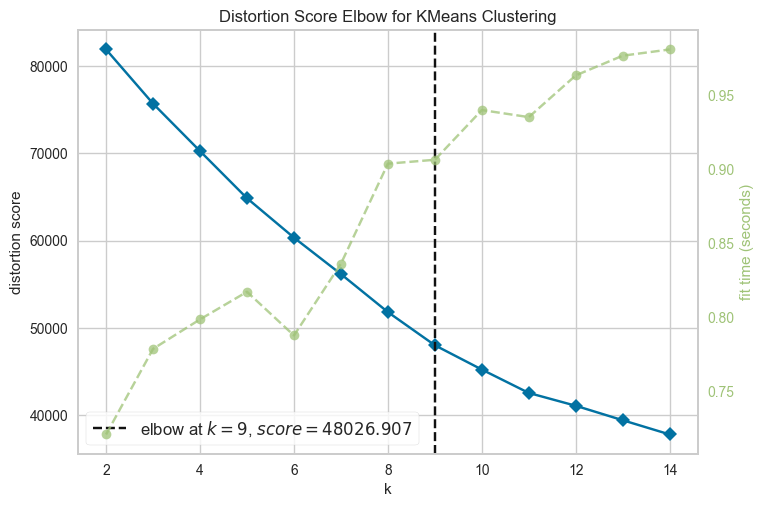

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(std_df_pca)        
visualizer.show() 

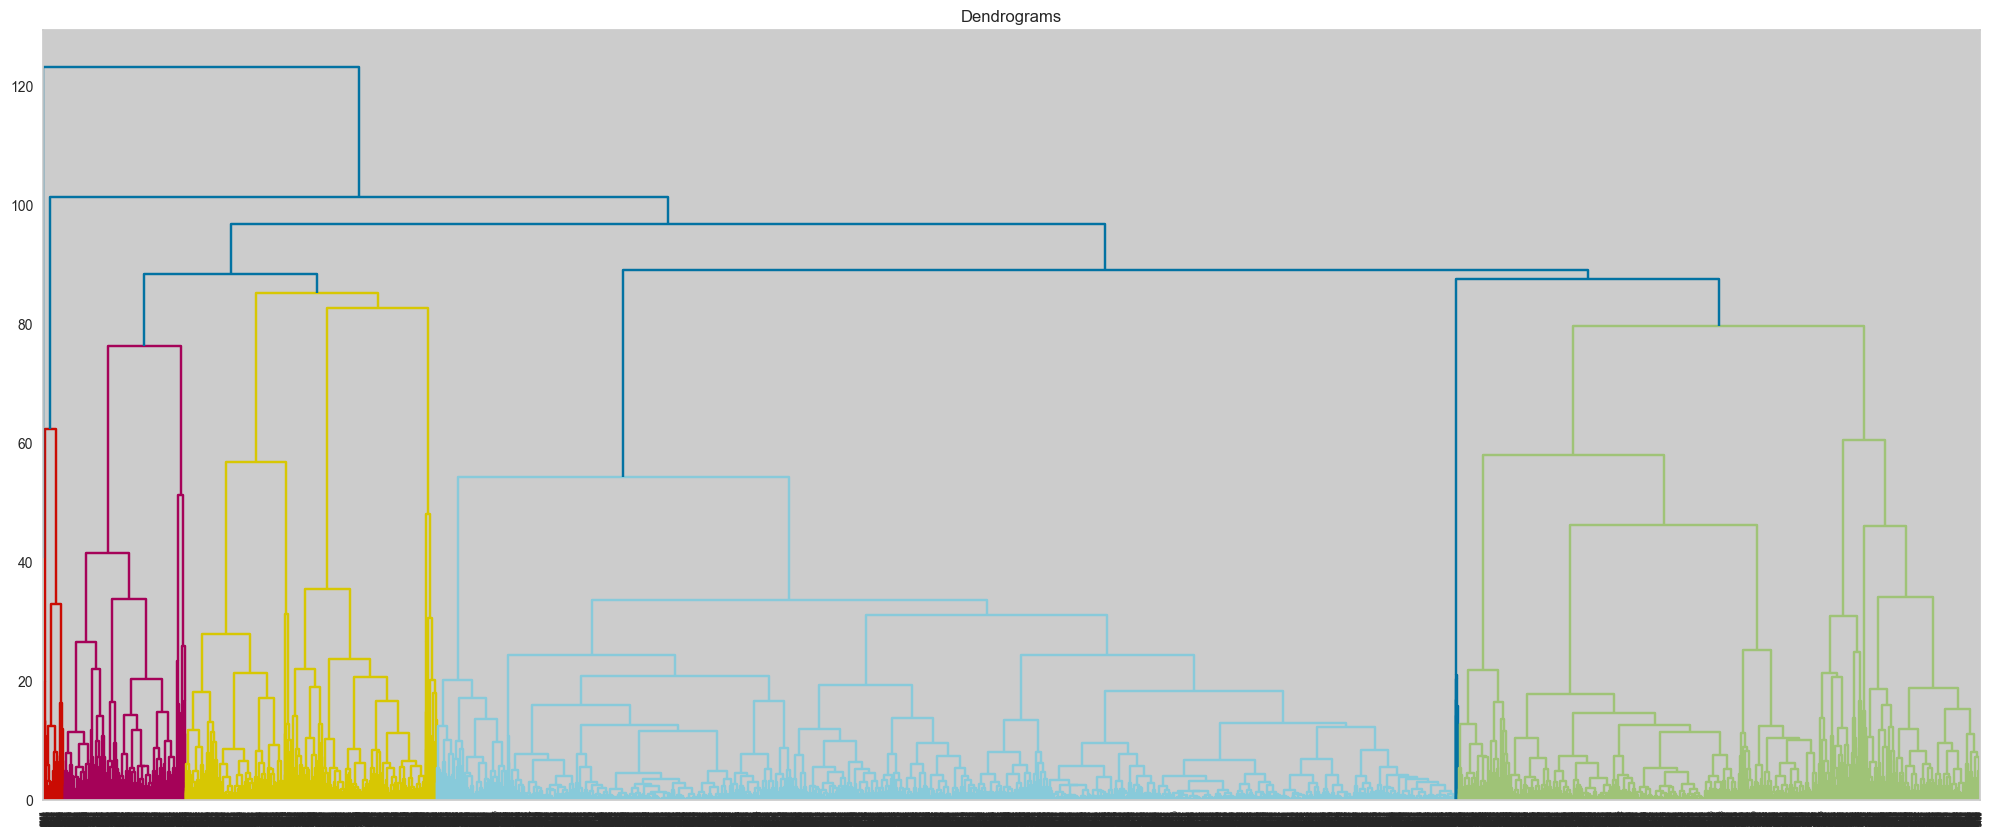

In [19]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(std_df_pca, method='ward'))

KMeans 
 Silhouette Score: 0.2831307949545869


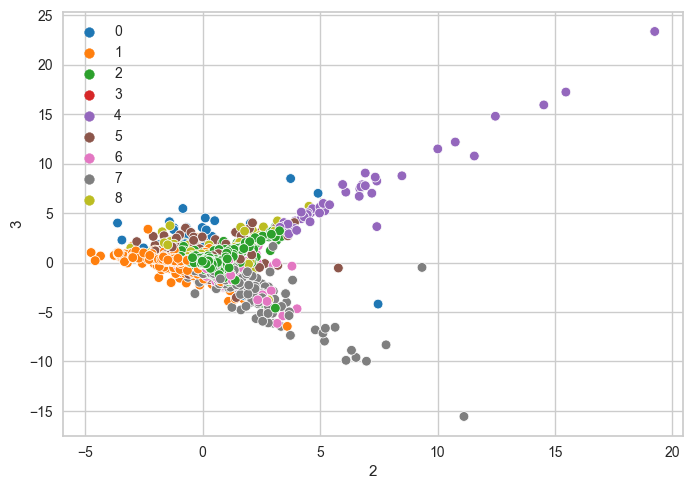

DBSCAN 
 Silhouette Score: 0.8262553875620678


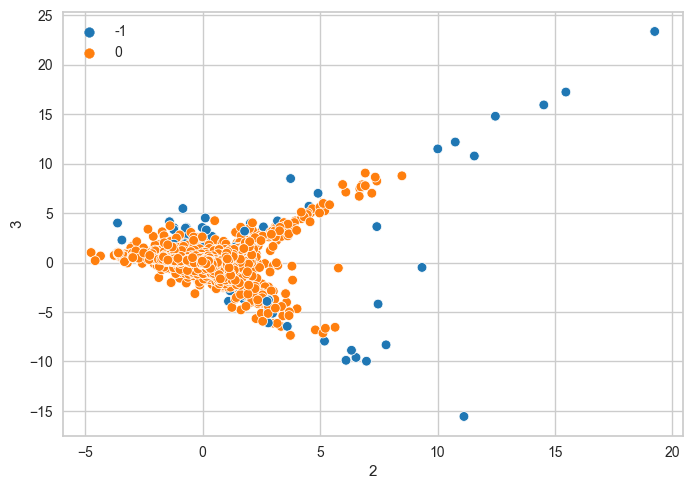

Hierarchical Clustering 
 Silhouette Score: 0.9086929519425108


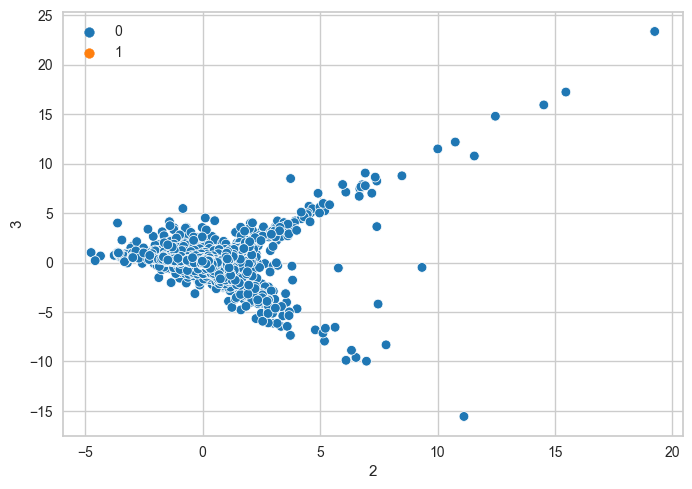

Gaussian Mixture 
 Silhouette Score: 0.5512292457240356


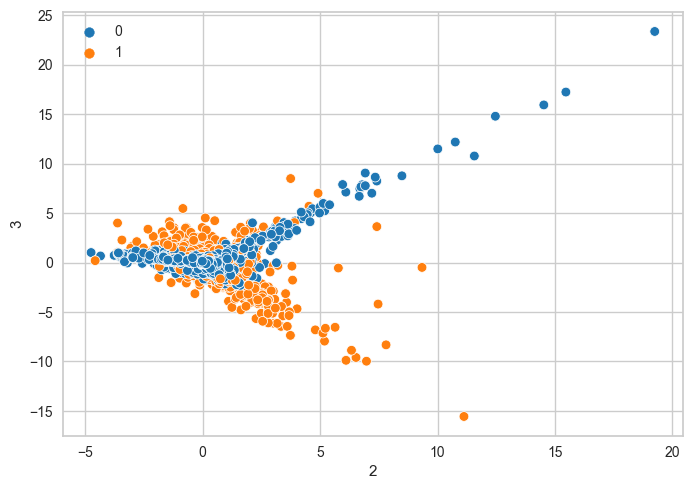

In [21]:
kmean = KMeans(n_clusters=9, random_state=0).fit(std_df_pca)
k_label = kmean.predict(std_df_pca)
print('KMeans', '\n', f'Silhouette Score: {silhouette_score(std_df_pca, k_label)}')
fig1 = sns.scatterplot(data=std_df_pca, x=std_df_pca[2], y=std_df_pca[3], hue=k_label, palette="tab10")
plt.show(sns)

DB = DBSCAN(eps=5, min_samples=25).fit(std_df_pca)
d_label = DB.labels_
print('DBSCAN', '\n', f'Silhouette Score: {silhouette_score(std_df_pca, d_label)}')
fig2= sns.scatterplot(data=std_df_pca, x=std_df_pca[2], y=std_df_pca[3], hue=d_label, palette="tab10")
plt.show(sns)

HC = AgglomerativeClustering(n_clusters=2).fit(std_df_pca)
h_label = HC.labels_
print('Hierarchical Clustering', '\n', f'Silhouette Score: {silhouette_score(std_df_pca, h_label)}')
fig3 = sns.scatterplot(data=std_df_pca, x=std_df_pca[2], y=std_df_pca[3], hue=h_label, palette="tab10")
plt.show(sns)

gm = GaussianMixture(2, random_state=0).fit(std_df_pca)
gm_label = gm.predict(std_df_pca)
print('Gaussian Mixture', '\n', f'Silhouette Score: {silhouette_score(std_df_pca, gm_label)}')
fig3 = sns.scatterplot(data=std_df_pca, x=std_df_pca[2], y=std_df_pca[3], hue=gm_label, palette="tab10")
plt.show(sns)

### Conclusion

- Hierarchical Clustering is the best clustering technique for this dataset with score of 0.9.
- For datasets with many features, PCA can highly improve model accuracy.